In [3]:
!pip install scikit-image
!pip install opencv-python

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
from PIL import Image, ImageEnhance
from os import listdir
import imghdr
from skimage.transform import rotate, AffineTransform, warp
from skimage import filters
from torchvision import transforms
import cv2
import scipy
import random

In [2]:
rmdir './Data/.ipynb_checkpoints'

rmdir: ./Data/.ipynb_checkpoints: No such file or directory


3900
0
0.21475277777777776
1
0.21075833333333333
2
0.13575555555555555
3
0.18614722222222221
4
0.16009722222222222
5
0.21829166666666666
6
0.24071666666666666
7
0.2946416666666667
8
0.213925
9
0.2159861111111111
10


KeyboardInterrupt: 

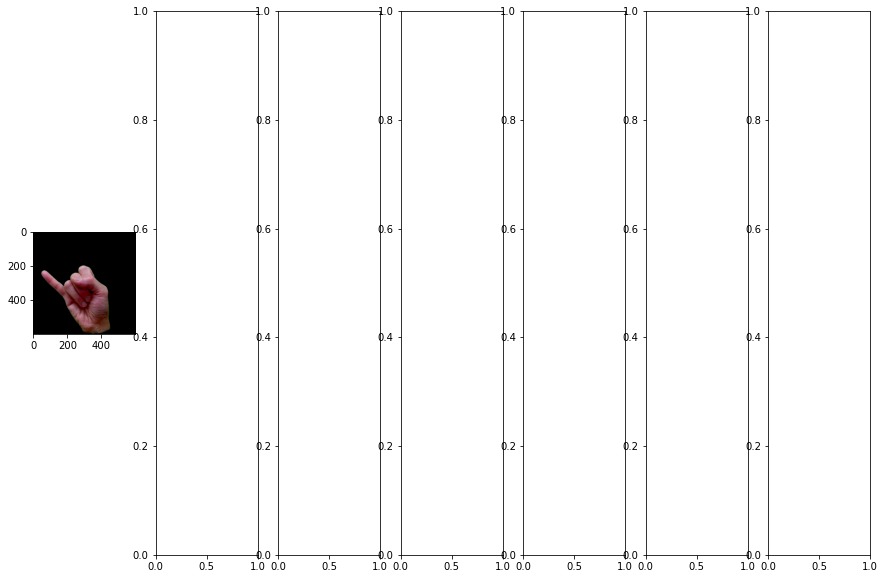

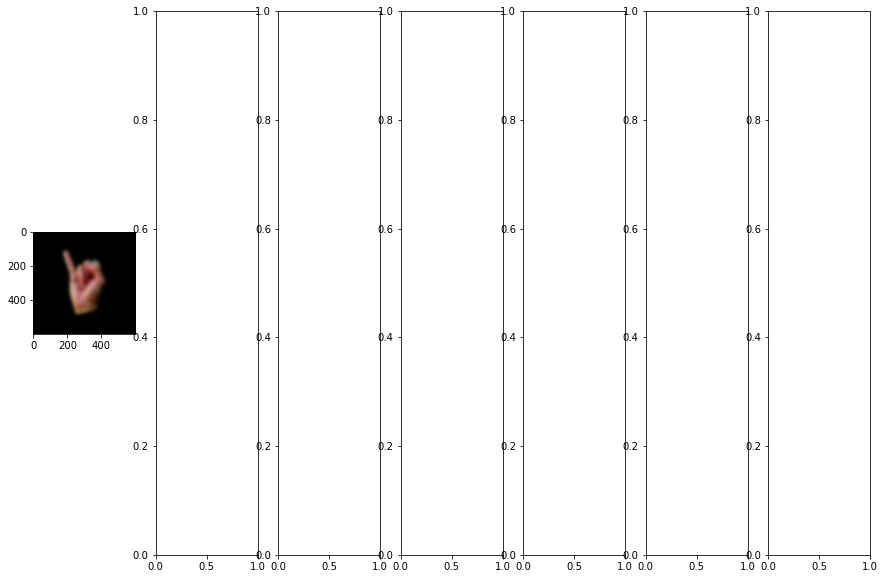

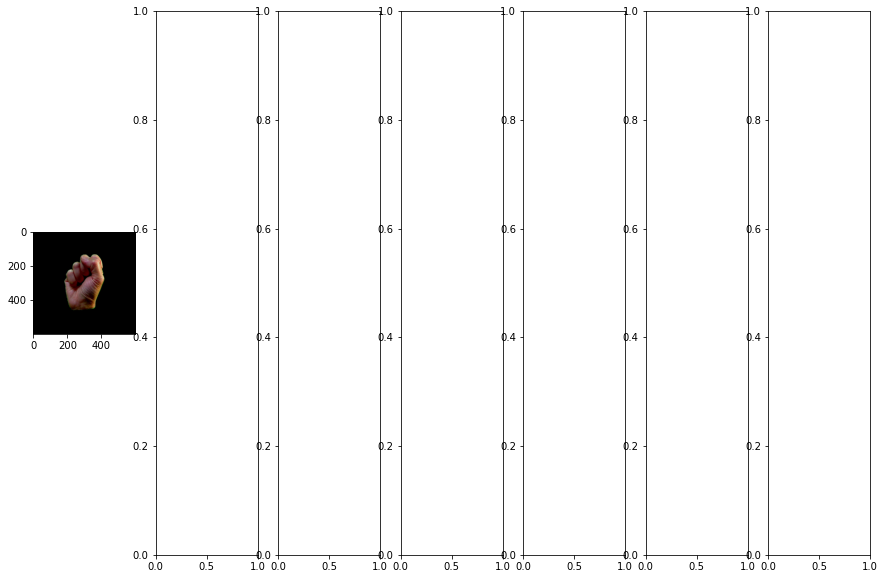

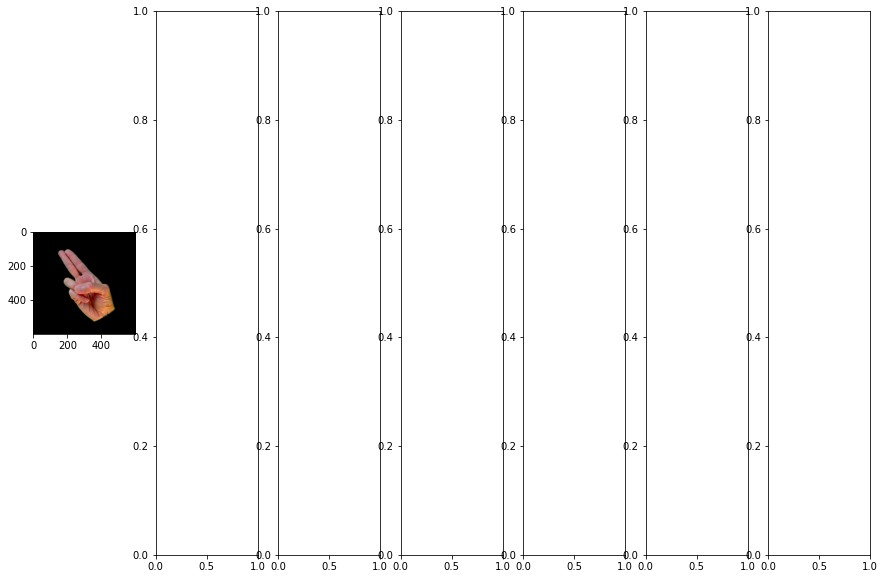

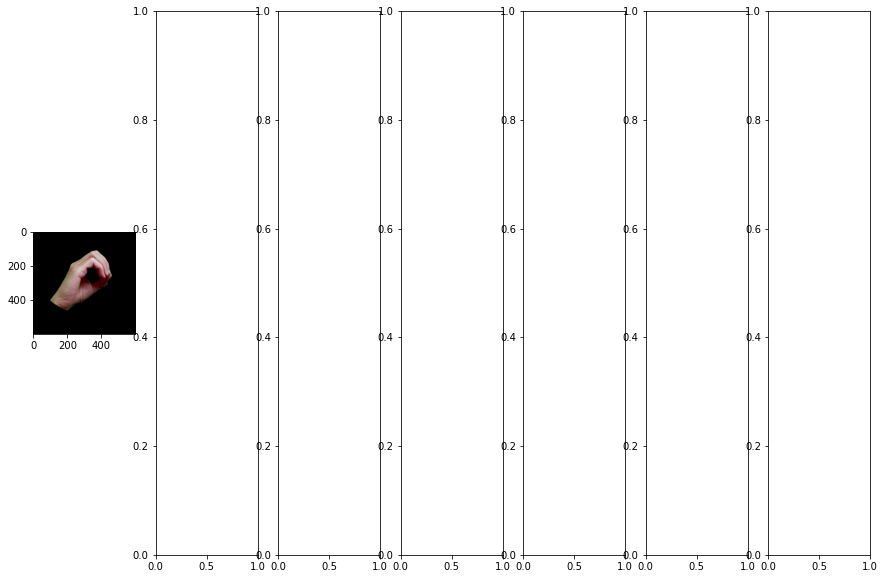

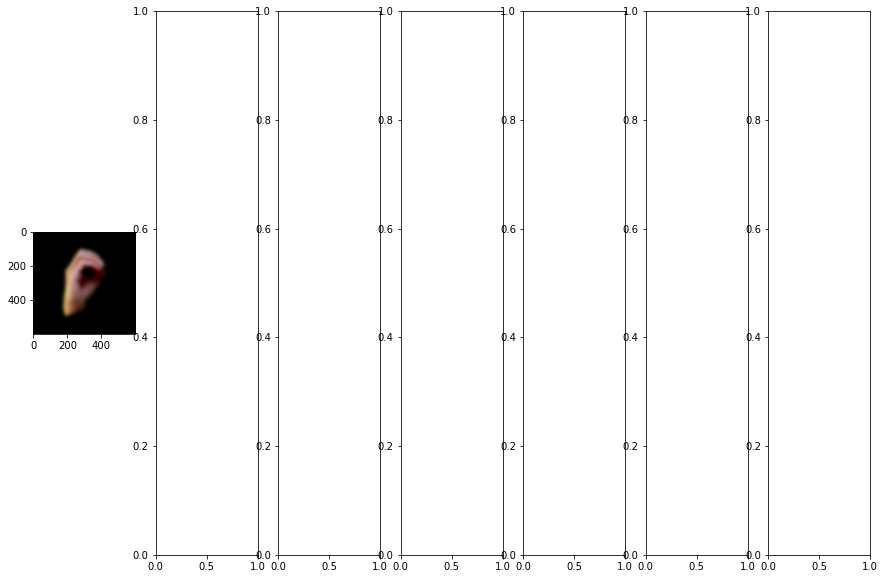

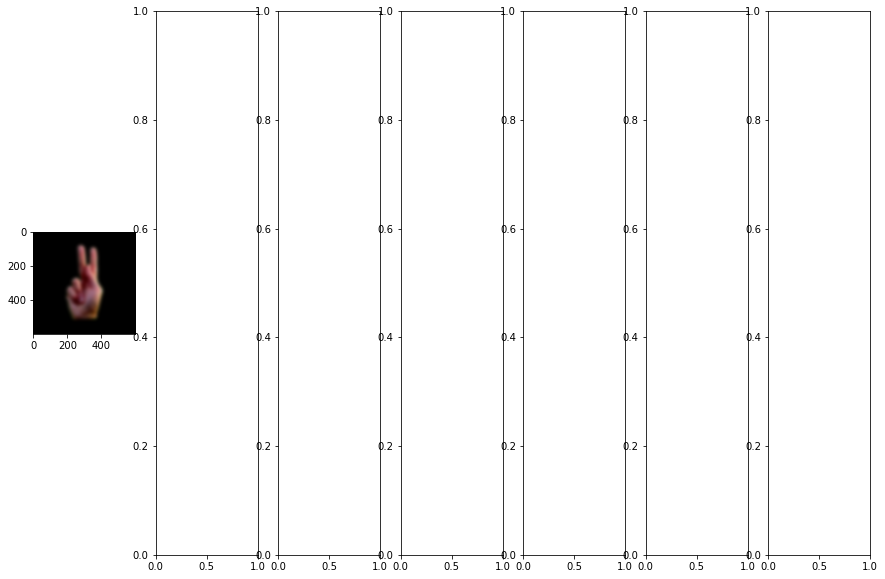

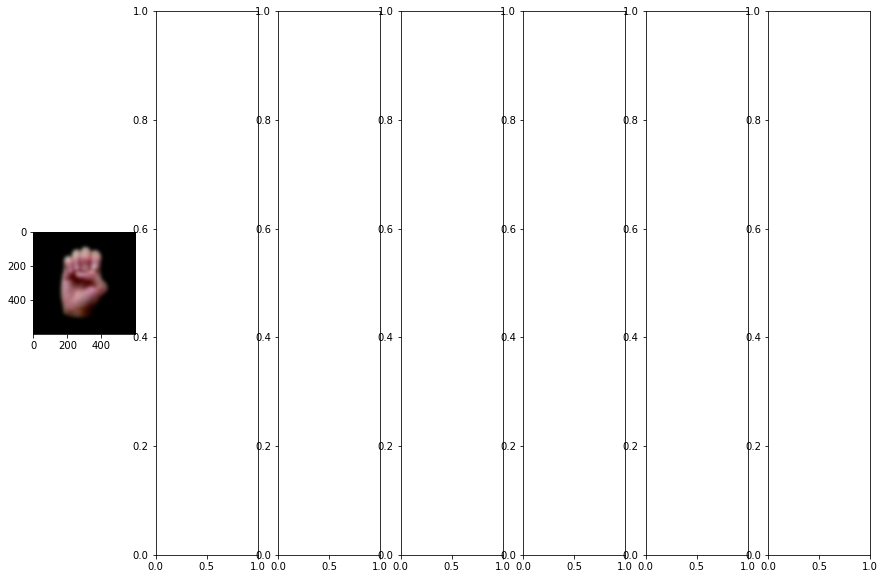

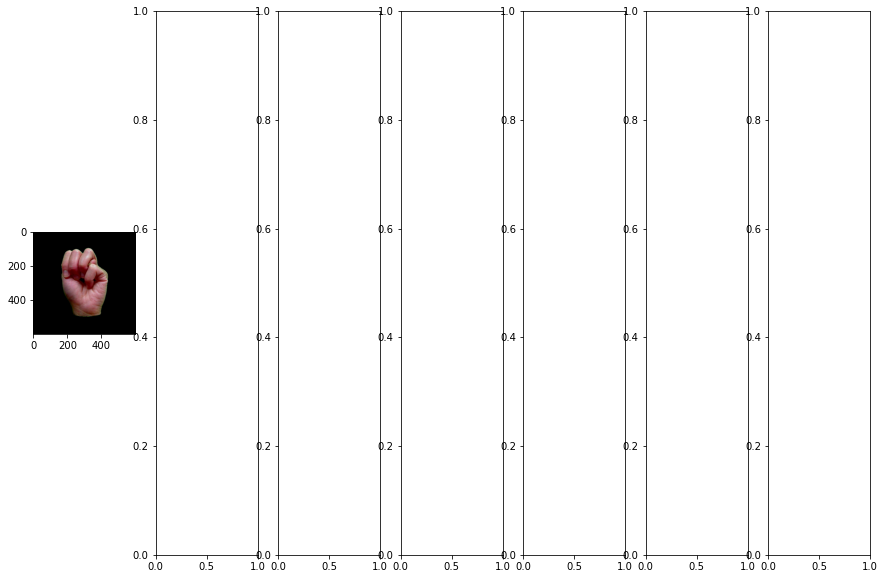

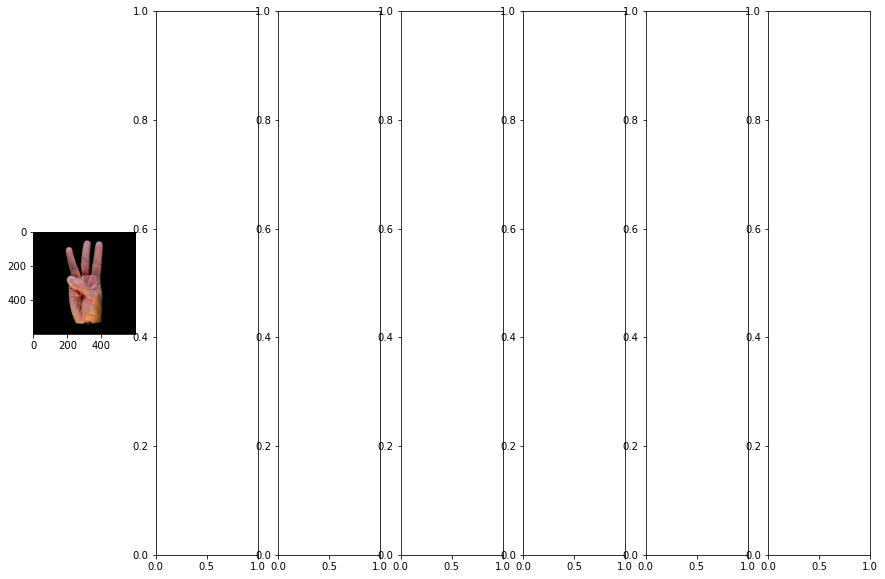

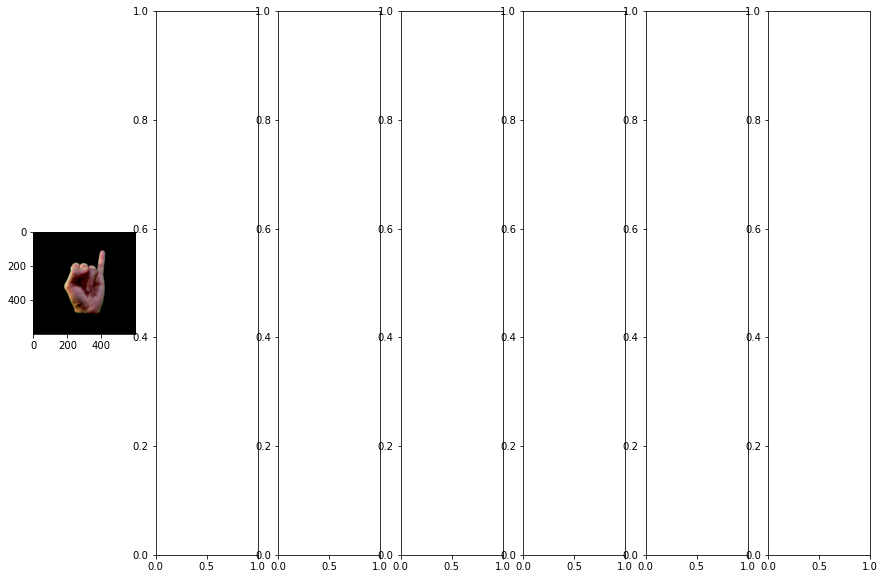

In [5]:
# Feature: Get proportion of hand in the image
#Load Data
# return array of images
def loadImages(path):
    imagesList = listdir(path)
    imgs = []
    labels = []
    for image in imagesList:
      if imghdr.what(path + image) == 'png':
        if (image[6].isalpha()): # only add 5 of each image, only add alphabetical values
          img = Image.open(path + image)
          imgs.append(np.array(img))
          labels.append(ord(image[6]) - ord('a')) # assumes that filename structure is 'handx_[label]_....'
    return imgs, labels

def HandToBack(imgs):
  features = [0] * len(imgs)
  for i in range(len(imgs)):
    # print(str(i))
    img = imgs[i]
    # fig, ax = plt.subplots(1, 7, figsize=(15,10))
    # ax[0].imshow(img) # Step 1
    total_pixels = img.shape[0] * img.shape[1]
    hand_pixels = 0
    img = np.reshape(img, (1, img.shape[0] * img.shape[1], 3))
    for j in range (img.shape[1]):
      if img[0][j][0] != 0 and img[0][j][1] != 0 and img[0][j][2] != 0:
        hand_pixels += 1
    features[i] =  hand_pixels / total_pixels
    # print(features[i])

  return features

# load png_images
path = "./FinalImages/"
# images in an array named imgs
imgs, labels = loadImages(path)
print(len(imgs))

# Step 1 convert png_images to np arrays
features = HandToBack(imgs)
print(len(features))

In [9]:
np.save('./FeaturesHandToBack/features_hand_to_back.npy', features)

In [ ]:
# Extras 

def getFeaturesHandToBack(imgs_array_before, i):
  reshaped_imgs = reshape_features(imgs_array_before)
  scaled_imgs_new = Scale_features(reshaped_imgs)
  translated_imgs_new = Translation_features(reshaped_imgs)
  flipped_imgs_new = VerticalFlip_features(reshaped_imgs)
  rotated30_imgs_new = Rotate30_features(reshaped_imgs)

  fig, ax = plt.subplots(1, 5, figsize=(15,10))
  ax[0].imshow(reshaped_imgs[0]) # Step 0
  ax[1].imshow(scaled_imgs_new[0]) # Step 1
  ax[2].imshow(translated_imgs_new[0]) # Step 2
  ax[3].imshow(flipped_imgs_new[0]) # Step 3
  ax[4].imshow(rotated30_imgs_new[0]) # Step 4

  features_orig = HandToBack(reshaped_imgs) #same for orig, blurred, brightened, darkened
  features_scaled = HandToBack(scaled_imgs_new) # for scaled
  features_translated = HandToBack(translated_imgs_new) # for translated
  features_flipped = HandToBack(flipped_imgs_new) # for flipped
  features_rotated30 = HandToBack(rotated30_imgs_new) # for rotated30

  features_hand_to_back_temp = np.concatenate((features_orig, features_orig, features_scaled, features_translated, features_flipped, features_rotated30), 0)
  print(features_hand_to_back_temp.shape)
  # np.save('../FeaturesHandToBack/features_hand_to_back' + str(i) + '.npy', features_hand_to_back_temp)
  return features_hand_to_back_temp

features_hand_to_back = np.empty(0)
n = int(650/65)
for i in range(n):
  features_hand_to_back_temp = getFeaturesHandToBack(imgs_array_before[i * 65:(i + 1) * 65], i)
  features_hand_to_back = np.concatenate((features_hand_to_back, features_hand_to_back_temp), 0)

print(features_hand_to_back.shape)
np.save('./FeaturesHandToBack/features_hand_to_back.npy', features_hand_to_back)